# Exploratory Analysis

## Summary Statistics

In [1]:
import pandas as pd

file_path = 'WC_Claims_2020-2022.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

summary_statistics = df['Age at Injury'].describe()
print(summary_statistics)


count    746216.000000
mean         42.108627
std          13.950492
min           0.000000
25%          30.000000
50%          42.000000
75%          54.000000
max         114.000000
Name: Age at Injury, dtype: float64


In [2]:
summary_statistics = df['Zip Code'].describe()
print(summary_statistics)

count     746216
unique      9040
top        11236
freq        4576
Name: Zip Code, dtype: object


In [3]:
summary_statistics = df['Cause of Injury'].describe()
print(summary_statistics)

count      728834
unique         74
top       LIFTING
freq        58149
Name: Cause of Injury, dtype: object


In [4]:
summary_statistics = df['Nature of Injury'].describe()
print(summary_statistics)

count             728775
unique                56
top       STRAIN OR TEAR
freq              192692
Name: Nature of Injury, dtype: object


In [5]:
summary_statistics = df['Part of Body'].describe()
print(summary_statistics)

count              727285
unique                 54
top       LOWER BACK AREA
freq                64679
Name: Part of Body, dtype: object


In [6]:
summary_statistics = df['Claim Type'].describe()
print(summary_statistics)

count                         746216
unique                             6
top       WORKERS COMPENSATION CLAIM
freq                          742399
Name: Claim Type, dtype: object


## Correlation

In [7]:
# Correlation between 'Represented' and 'Highest Process'
correlation = df['Represented'].corr(df['Highest Process'])

print(f"Correlation between 'Represented' and 'Highest Process': {correlation}")


Correlation between 'Represented' and 'Highest Process': 0.636826871299429


In [8]:
# Correlation between 'Represented' and 'Hearing Count'
correlation = df['Represented'].corr(df['Hearing Count'])

print(f"Correlation between 'Represented' and 'Hearing Count': {correlation}")

Correlation between 'Represented' and 'Hearing Count': 0.5712619375311188


In [9]:
# Correlation between 'Hearing Count' and 'Highest Process'
correlation = df['Hearing Count'].corr(df['Highest Process'])

print(f"Correlation between 'Hearing Count' and 'Highest Process': {correlation}")

Correlation between 'Hearing Count' and 'Highest Process': 0.7029540841351388


In [10]:
# Correlation between 'Represented' and 'Highest Process'
correlation = df['Age at Injury'].corr(df['Highest Process'])

print(f"Correlation between 'Age at Injury' and 'Highest Process': {correlation}")

Correlation between 'Age at Injury' and 'Highest Process': 0.10149236435020292


In [11]:
# Correlation between 'Age at Injury' and 'Highest Process'
correlation = df['Age at Injury'].corr(df['Represented'])

print(f"Correlation between 'Age at Injury' and 'Represented': {correlation}")

Correlation between 'Age at Injury' and 'Represented': 0.1196016721439712


## Numbers

In [12]:
# Group by 'Part of Body' and count occurrences of 'Claim Identifier'
grouped_data = df.groupby('Part of Body')['Claim Identifier'].count().reset_index()

# Sort the DataFrame by 'Claim Identifier' in descending order
grouped_data = grouped_data.sort_values(by='Claim Identifier', ascending=False)

# Select only the top 10 body parts
top_10 = grouped_data.head(10)

# Print the sorted data
print(top_10)

                           Part of Body  Claim Identifier
23                      LOWER BACK AREA             64679
20                                 KNEE             59369
28                             MULTIPLE             54431
12                            FINGER(S)             51784
39                          SHOULDER(S)             45210
15                                 HAND             42985
1                                 ANKLE             31562
29  MULTIPLE BODY PARTS (INCLUDING BODY             27315
41                          SOFT TISSUE             26361
13                                 FOOT             24504


In [13]:
# Group by 'Industry Code Description' and count occurrences of 'Claim Identifier'
grouped_data = df.groupby('Industry Code Description')['Claim Identifier'].count().reset_index()

# Sort the DataFrame by 'Claim Identifier' in descending order
grouped_data = grouped_data.sort_values(by='Claim Identifier', ascending=False)

# Select only the top 10 body parts
top_10 = grouped_data.head(10)

# Print the sorted data
print(top_10)

                            Industry Code Description  Claim Identifier
7                   HEALTH CARE AND SOCIAL ASSISTANCE            152518
14                              PUBLIC ADMINISTRATION            115236
16                                       RETAIL TRADE             85325
17                     TRANSPORTATION AND WAREHOUSING             64660
5                                EDUCATIONAL SERVICES             61658
10                                      MANUFACTURING             49399
4                                        CONSTRUCTION             36912
0                     ACCOMMODATION AND FOOD SERVICES             36042
1   ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...             26883
19                                    WHOLESALE TRADE             19445


## Visualization

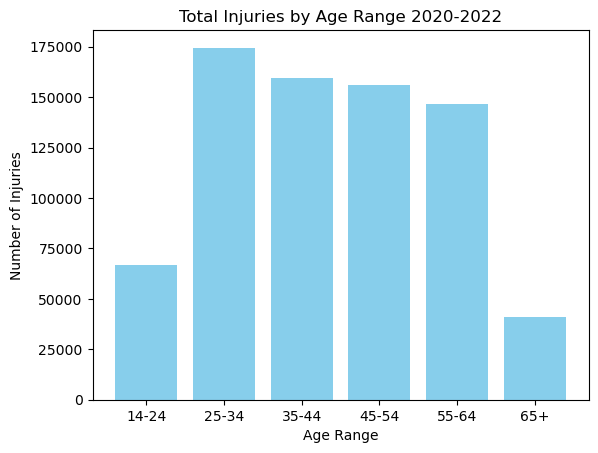

In [14]:
import matplotlib.pyplot as plt

# Define age ranges
bins = [14, 24, 34, 44, 54, 64, float('inf')]
labels = ['14-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'Age Range' based on the defined ranges
df['Age Range'] = pd.cut(df['Age at Injury'], bins=bins, labels=labels, right=False)

# Group by 'Age Range' and count occurrences of 'Body Part Injured'
grouped_data = df.groupby('Age Range')['Claim Identifier'].count().reset_index()

# Create a column chart
plt.bar(grouped_data['Age Range'], grouped_data['Claim Identifier'], color='skyblue')
plt.title('Total Injuries by Age Range 2020-2022')
plt.xlabel('Age Range')
plt.ylabel('Number of Injuries')
plt.show()

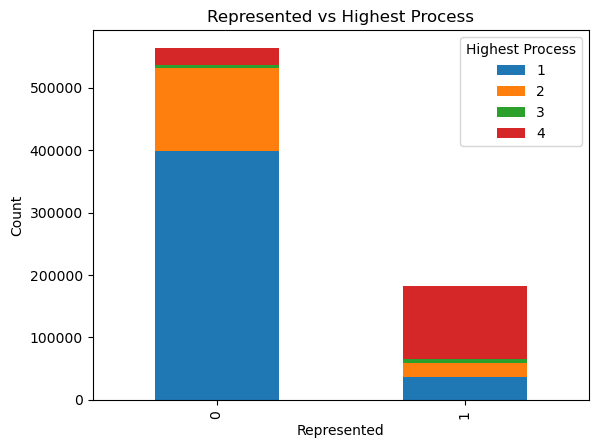

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

final_output_file = 'WC_Claims_2020-2022.csv'
df = pd.read_csv(final_output_file)

data = {'Claim Identifier': df['Claim Identifier'],
        'Represented': df['Represented'],
        'Highest Process': df['Highest Process']}
df = pd.DataFrame(data)

# Group by 'Represented' and 'Highest Process' and count occurrences
count_data = df.groupby(['Represented', 'Highest Process']).size().unstack()

# Create a column chart
count_data.plot(kind='bar', stacked=True)

# Set labels and title
plt.title('Represented vs Highest Process')
plt.xlabel('Represented')
plt.ylabel('Count')

# Show the plot
plt.show()

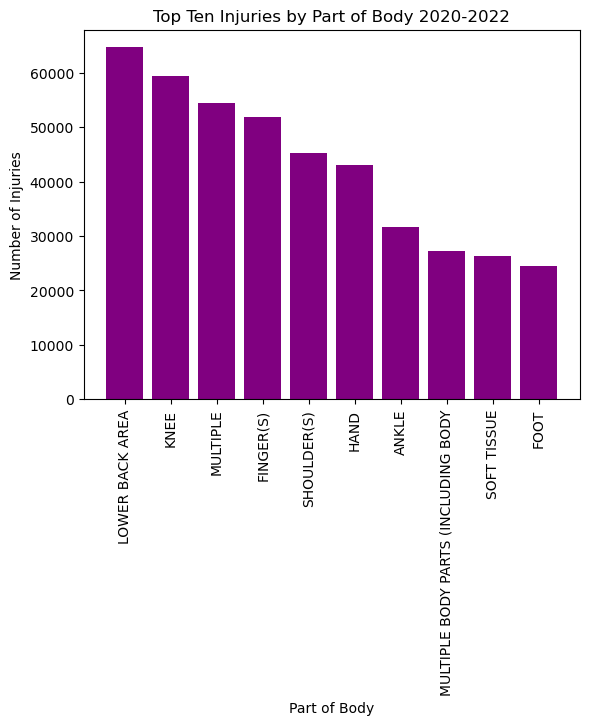

In [15]:
# Group by 'Part of Body' and count occurrences of 'Claim Identifier'
grouped_data = df.groupby('Part of Body')['Claim Identifier'].count().reset_index()

# Sort the DataFrame by 'Claim Identifier' in descending order
grouped_data = grouped_data.sort_values(by='Claim Identifier', ascending=False)

# Select only the top 10 body parts
top_10 = grouped_data.head(10)

# Rotate x-axis labels to the side
plt.xticks(rotation='vertical')

# Create a column chart
plt.bar(top_10['Part of Body'], top_10['Claim Identifier'], color='purple')
plt.title('Top Ten Injuries by Part of Body 2020-2022')
plt.xlabel('Part of Body')
plt.ylabel('Number of Injuries')
plt.show()

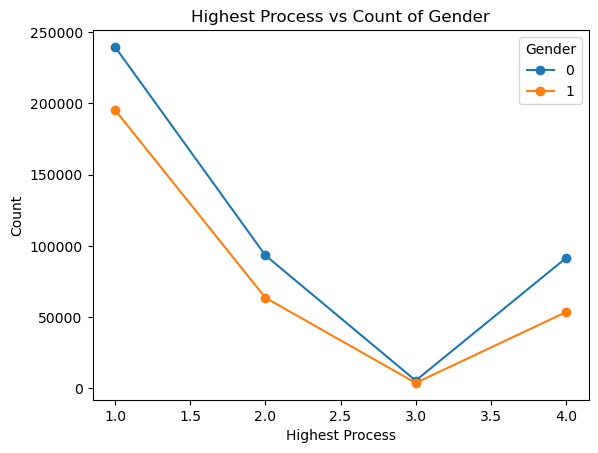

In [16]:
data = {'Gender': df['Gender'],
        'Highest Process': df['Highest Process']}

df2 = pd.DataFrame(data)

# Create a DataFrame with counts of each gender for each 'Highest Process' value
count_data = pd.crosstab(df2['Highest Process'], df2['Gender'])

# Create a line graph
count_data.plot(kind='line', marker='o', linestyle='-')

# Set labels and title
# Set x-axis ticks to unique values of 'Highest Process'
#plt.xticks(range(len(count_data.index)), count_data.index)
plt.title('Highest Process vs Count of Gender')
plt.xlabel('Highest Process')
plt.ylabel('Count')

# Rotate x-axis labels to the side
#plt.xticks(rotation='vertical')

# Show the plot
plt.show()


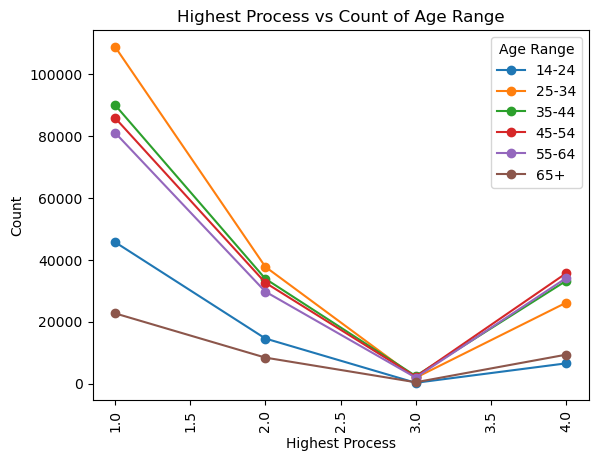

In [17]:
data = {'Age': df['Age at Injury'],
        'Highest Process': df['Highest Process']}

df3 = pd.DataFrame(data)

# Define bins and labels for age ranges
bins = [14, 24, 34, 44, 54, 64, float('inf')]
labels = ['14-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'Age Range' based on the defined bins
df3['Age Range'] = pd.cut(df3['Age'], bins=bins, labels=labels, right=False)

# Create a DataFrame with counts of each age range for each 'Highest Process' value
count_data = pd.crosstab(df['Highest Process'], df3['Age Range'])

# Create a line graph
count_data.plot(kind='line', marker='o', linestyle='-')

# Set labels and title
plt.title('Highest Process vs Count of Age Range')
plt.xlabel('Highest Process')
plt.ylabel('Count')

# Rotate x-axis labels to the side
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [18]:
data = {'Age': df['Age at Injury'],
        'Highest Process': df['Highest Process']}

df4 = pd.DataFrame(data)

# Define bins and labels for age ranges
bins = [14, 24, 34, 44, 54, 64, float('inf')]
labels = ['14-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'Age Range' based on the defined bins
df4['Age Range'] = pd.cut(df4['Age'], bins=bins, labels=labels, right=False)

# Create a DataFrame with counts of each age range for each 'Highest Process' value
count_data = pd.crosstab(df['Highest Process'], df['Age Range'], margins=True, margins_name='Total')

# Calculate percentages
percentage_data = count_data.div(count_data['Total'], axis=0) * 100

# Display the percentage data
print(percentage_data)


Age Range            14-24      25-34      35-44      45-54      55-64  \
Highest Process                                                          
1                10.526449  25.066990  20.736324  19.774389  18.670525   
2                 9.282001  24.057925  21.590380  20.778923  18.943574   
3                 2.682661  20.479826  26.619411  24.416576  21.188659   
4                 4.506384  18.034520  22.901581  24.597175  23.517909   
Total             8.997897  23.431327  21.409368  20.980322  19.701104   

Age Range             65+  Total  
Highest Process                   
1                5.225323  100.0  
2                5.347198  100.0  
3                4.612868  100.0  
4                6.442430  100.0  
Total            5.479982  100.0  


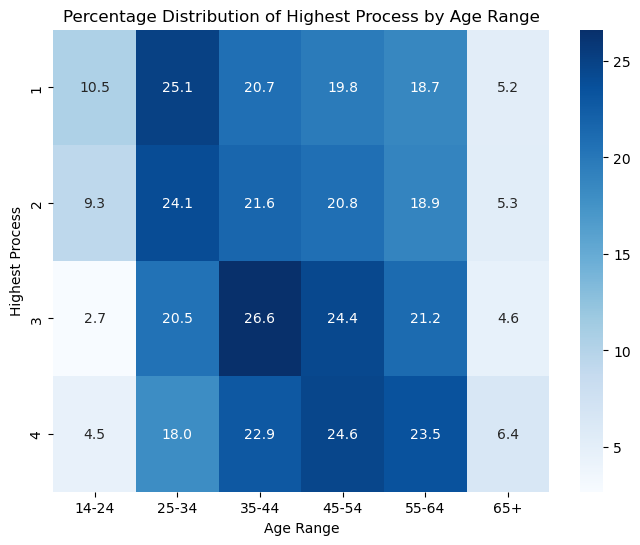

In [19]:
import seaborn as sns

# Drop the 'Total' row and column for better visualization
percentage_data = percentage_data.drop('Total', axis=0)
percentage_data = percentage_data.drop('Total', axis=1)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(percentage_data, annot=True, cmap='Blues', fmt='.1f', cbar=True)
plt.title('Percentage Distribution of Highest Process by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Highest Process')
plt.show()


Highest Process          1          2         3          4
Age Range                                                 
14-24            68.184464  21.714797  0.367137   9.733602
25-34            62.351923  21.613071  1.076298  14.958708
35-44            56.451107  21.228125  1.531079  20.789688
45-54            54.933274  20.848081  1.433098  22.785547
55-64            55.234512  20.240749  1.324390  23.200349
65+              55.574887  20.540090  1.036561  22.848461


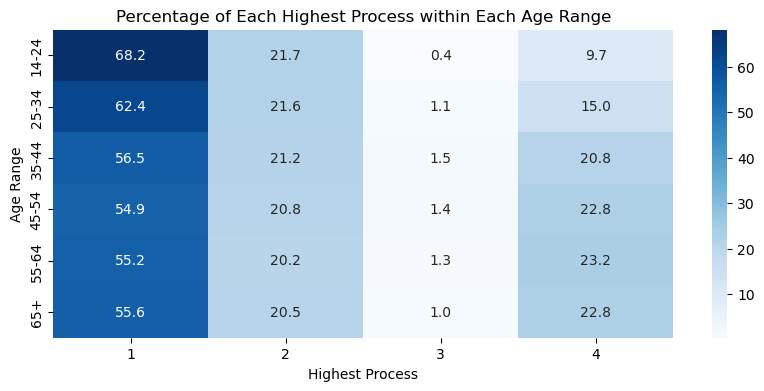

In [20]:
# Define bins and labels for age ranges
bins = [14, 24, 34, 44, 54, 64, float('inf')]
labels = ['14-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'Age Range' based on the defined bins
df['Age Range'] = pd.cut(df['Age at Injury'], bins=bins, labels=labels, right=False)

# Create a DataFrame with counts of each 'Highest Process' for each 'Age Range' value
count_data = pd.crosstab(df['Age Range'], df['Highest Process'], margins=True, margins_name='Total')

# Calculate percentages
percentage_data = count_data.div(count_data['Total'], axis=0) * 100

# Drop the 'Total' row and column for better visualization
percentage_data = percentage_data.drop('Total', axis=0)
percentage_data = percentage_data.drop('Total', axis=1)

print(percentage_data)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 4))
sns.heatmap(percentage_data, annot=True, cmap='Blues', fmt='.1f', cbar=True)
plt.title('Percentage of Each Highest Process within Each Age Range')
plt.xlabel('Highest Process')
plt.ylabel('Age Range')
plt.show()


  Accident Accident Date  Age at Injury  Represented  Claim Identifier  \
0        Y    06/01/2021             69            1           5798945   
1        Y    02/24/2020             64            0           5445809   
2        Y    09/01/2021             28            0           5834084   
3        Y    10/28/2020             34            0           5591509   
4        Y    02/26/2020             39            0           5446212   

  Claim Injury Type                  Claim Type  Closed Count  \
0      1. CANCELLED  WORKERS COMPENSATION CLAIM             3   
1       2. NON-COMP  WORKERS COMPENSATION CLAIM             1   
2       2. NON-COMP  WORKERS COMPENSATION CLAIM             1   
3       2. NON-COMP  WORKERS COMPENSATION CLAIM             1   
4       2. NON-COMP  WORKERS COMPENSATION CLAIM             1   

  County of Injury Current Claim Status  ...    Cause of Injury  \
0           ALBANY       CASE CANCELLED  ...  REPETITIVE MOTION   
1            KINGS    NO FURTH

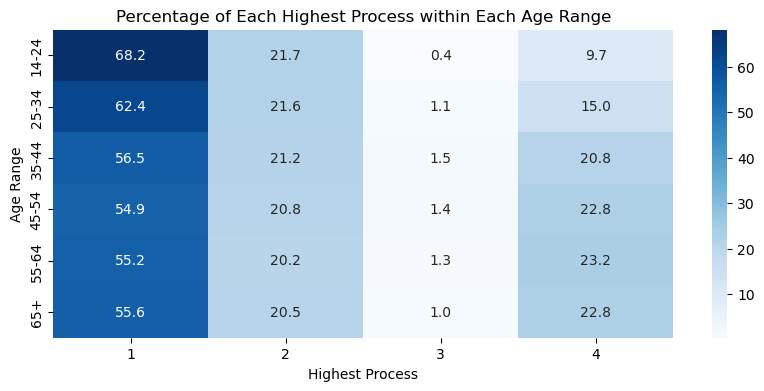

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your data
df = pd.read_csv("WC_Claims_2020-2022.csv")
# Use one-hot encoding for the 'Highest Process' column
df_encoded = pd.get_dummies(df, columns=['Highest Process'], prefix='Process')

# Display the resulting DataFrame
print(df_encoded.head())

# Define bins and labels for age ranges
bins = [14, 24, 34, 44, 54, 64, float('inf')]
labels = ['14-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'Age Range' based on the defined bins
df['Age Range'] = pd.cut(df['Age at Injury'], bins=bins, labels=labels, right=False)

# Create a DataFrame with counts of each 'Highest Process' for each 'Age Range' value
count_data = pd.crosstab(df['Age Range'], df['Highest Process'], margins=True, margins_name='Total')

# Calculate percentages
percentage_data = count_data.div(count_data['Total'], axis=0) * 100

# Drop the 'Total' row and column for better visualization
percentage_data = percentage_data.drop('Total', axis=0)
percentage_data = percentage_data.drop('Total', axis=1)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 4))
sns.heatmap(percentage_data, annot=True, cmap='Blues', fmt='.1f', cbar=True)
plt.title('Percentage of Each Highest Process within Each Age Range')
plt.xlabel('Highest Process')
plt.ylabel('Age Range')
plt.show()


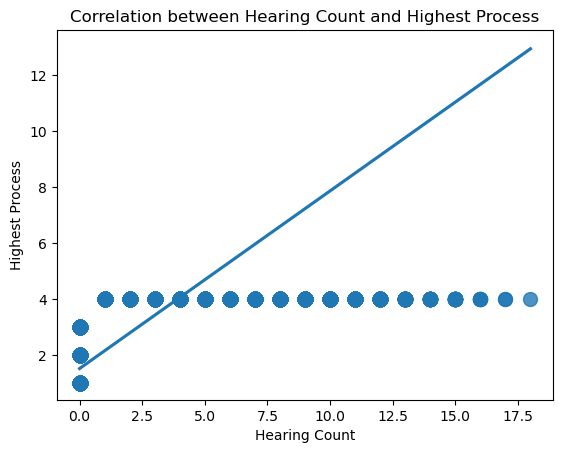

In [22]:
# Sample data
data = {'Hearing Count': df['Hearing Count'],
        'Highest Process': df['Highest Process']}

df = pd.DataFrame(data)

# Create a scatter plot with a trendline
sns.regplot(x='Hearing Count', y='Highest Process', data=df, scatter_kws={'s': 100})

# Set labels and title
plt.title('Correlation between Hearing Count and Highest Process')
plt.xlabel('Hearing Count')
plt.ylabel('Highest Process')

# Show the plot
plt.show()